In [1]:
from model import *
from data import *

In [3]:
# for Gunpowder
ZARR_FOLDER = '../../../../data/cells/raw/zarr/'
gp_batch_size= 12
gp_voxel_shape = [1,1,1]
gp_input_shape= [240, 240,4]
gp_output_shape = [ 240, 240,4]

# For unet
OUTPUT_PATH = '../../../../data/cells/models/'
model_name = 'unet_cells.hdf5'
unet_input_size = (240,240,4)
unet_output_size = 4

### Check data 

In [4]:
gen_train_fast = generate_fast_training_batch(ZARR_FOLDER, batch_size=gp_batch_size
                                              ,voxel_shape = gp_voxel_shape,
                                              input_shape= gp_input_shape,output_shape = gp_output_shape )

In [5]:
im,mask = next(gen_train_fast)

In [6]:
test_im = im[0]
test_mask = mask[0]
print('Img size: {} {} < {} | Mask size: {} {} <{}'.format(test_im.shape,test_im.dtype,test_im.max()
                                                                   ,test_mask.shape,test_mask.dtype,test_mask.max()))

Img size: (240, 240, 4) float32 < 1.0 | Mask size: (240, 240, 4) float32 <1.0


### Model

In [7]:
model = unet(input_size = unet_input_size ,output_size = unet_output_size)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 240, 240, 4) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 240, 240, 64) 2368        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 240, 240, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 120, 120, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

### Train

In [9]:
model_file = os.path.join(OUTPUT_PATH,model_name)
model_checkpoint = ModelCheckpoint(model_file, monitor='loss',verbose=1, save_best_only=True)

In [10]:
history = model.fit_generator(gen_train_fast,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])


299/300 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9728
Epoch 00001: loss improved from inf to 0.07188, saving model to ../../../../data/cells/models/unet_cells.hdf5
300/300 [==============================] - 218s 728ms/step - loss: 0.0719 - accuracy: 0.9728


### Test

In [12]:
im,mask = next(gen_train_fast)

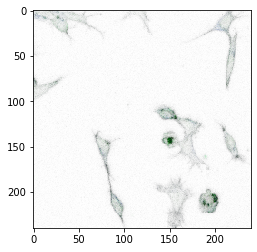

In [21]:
plt.imshow(im[0])
# print(im[0])

In [14]:
results = model.predict(im)

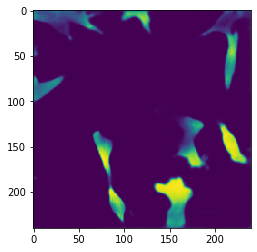

In [20]:
plt.imshow(results[0][:,:,3])